# Practice 6: RSD

## Course: "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), IF-UNAM

## Ex. 1: Redshift Space Distortions

The idea of this exercise is to **apply the Redshift Space Distortions to galaxies from a simulation**. You will observe the distortions on the density field and then compare the PS before and after RSD. You will use the file *"Data_galaxies_z0695.txt"* in which the 7 columns are $x, y, z, v_x, v_y, v_z, flag$. The first 3 of them are the positions (in Mpc), the 3 next are the velocities according to each axis (in km/s), and the last one is a *flag* providing information over the type of galaxy (0 if *central*, 1 if *satellite*).

1. Read the file to get the positions and velocities of the galaxies and select the central galaxies

2. Generate new positions (keep the original ones, you will need it after) applying the RSD according to the Z-axis. This is a good approximation when the observer is far away the volume containing the galaxies which the case here knowing the simulation is for a redshift z = 0.695. You need to calculate the of H(z) for this redshift, use the cosmology Ωm = 0.3, ΩΛ = 0.7

3. Generate the cube of galaxy density with the original positions and another cube of galaxy density using the new positions after applying RSD. Use a pixel size of 5 Mpc (so an array 200 per 200 per 200). Due to the RSD you have to be careful with the new positions en Z-axis that can be outside the box. You can remove these galaxies or better move the galaxies at the other side of the cube using periodicity.

4. Plot a slice at a given position in X-axis of the two density cube (so the coordinates of the slice are Y-Z). Do you see any difference?

5. Using your code from the second practice, calculate the Power Spectrum for the two cubes of density

6. Plot on the same figure the 2 Power Spectra you get (in log-log scale)

7. The difference between the 2 PS should be equal to $\frac{P_{RSD}(k)}{P(k)} = 1 + \frac{2}{3}\beta +\frac{1}{5} \beta^2$. The growth factor for the simulation you use is $f = 0.81$ and the bias of the galaxies is $b = 2.1$. Do you find this difference between the 2 Power Spectra? $ \left( \frac{P_{RSD}(k)}{P(k)} = (b^2 + \frac{2}{3}bf + \frac{1}{5}f^2) \right)$

8. **BONUS**: In order to see the Finger of God effect you can redo the galaxy density cubes using the satellite galaxies ($flag = 1$) and plot the same slice at given value of X-axis (as in point 4).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Importing txt file 'Data_galaxies_z0695.txt'

filename = 'Data_galaxies_z0695.txt'
data = np.loadtxt(filename, skiprows=1, dtype=float)
print(data.shape) # there are 816 550 objects

(816550, 7)


In [3]:
# selecting central galaxies (i.e., flag == 0)

index_central = np.where(data[:,6] == 0)
data_centralgal = data[index_central[0], :6]

N_central = data_centralgal.shape[0] # Number of central galaxies is 672274
data_centralgal

array([[ 1.67447090e+01,  2.57091403e+00,  5.84972024e-01,
        -1.22694443e+02,  4.85107300e+02,  2.84707581e+02],
       [ 9.59394836e+00,  6.41187012e-01,  6.46782494e+00,
        -3.99404785e+02,  3.55469894e+01, -4.00486298e+02],
       [ 1.30437050e+01,  1.89935696e+00,  4.85072279e+00,
        -2.64532806e+02, -1.24301285e+02, -4.41058350e+02],
       ...,
       [ 2.22661495e+01,  5.02987480e+00,  1.87989995e-02,
        -5.04009674e+02, -7.80403018e-01, -4.06270172e+02],
       [ 1.75221924e+02,  3.14156151e+01,  2.44873002e-01,
        -4.77437515e+01,  7.80901184e+02,  7.83053360e+01],
       [ 5.81966980e+02,  2.46343670e+01,  1.73339993e-01,
        -1.06844931e+01,  5.63459534e+02,  9.70431290e+01]])

Using $\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$, and knowing the fact that 

$$
    H(z) =H_0 \sqrt{\Omega_{M}(1+z)^3 +\Omega_{r}(1+z)^4 +\Omega_{\Lambda}} \qquad (\Omega_r=\Omega_K=0),
$$

we compute the RSD as

$$
    s = r + \frac{v}{aH(a)} = H_0 d + \frac{v(1+z)}{H(z)},
$$

where $v = \hat{r}\cdot \vec{v}_i$ and $r = H_0 d$  (being $\hat{r}$ the direction of the LoS, in this case $\hat{k}$ is taken).

In [4]:
Omega_M = 0.3; Omega_lambda = 0.7
# H0 = 1/2997.9246 # in units of h/Mpc
H0 = 70 # in km/Mpc/s (assuming h=0.7) to get the right units of distance (Mpc)

H_z = H0*np.sqrt(Omega_M*(1+ 0.695)**3 + Omega_lambda)
z_factor = (1+0.695)/H_z
z_factor

0.016472176620837636

In [5]:
x = data_centralgal[:,0]; y = data_centralgal[:,1]; z = data_centralgal[:,2] # they goes from 0 to 1000
v_x = data_centralgal[:,3]; v_y = data_centralgal[:,4]; v_z = data_centralgal[:,5] 

# s = np.zeros(N_central)
xs = np.zeros(N_central)
ys = np.zeros(N_central)
zs = np.zeros(N_central)

for i in range(N_central):
#     s[i] = H0*(np.sqrt(x[i]**2 + y[i]**2 + z[i]**2)) + (np.sqrt(v_x[i]**2 + v_y[i]**2 + v_z[i]**2))*z_factor
    xs[i] = x[i] #+ v_x[i]*z_factor    # *** se le quitó el H0 del primer sumando
    ys[i] = y[i] #+ v_y[i]*z_factor
    zs[i] = z[i] + v_z[i]*z_factor

In [6]:
# pixel size 5 Mpc (array 200x200x200)
gridsize = 5
grid_x = np.arange(0,1000, gridsize)
grid_y = np.arange(0,1000, gridsize)
grid_z = np.arange(0,1000, gridsize)

In [7]:
# Computing the galaxy number density w/ the real and distored positions

density_arr = np.zeros((200,200,200))

# for i in range(N_central):
for i in range(N_central):
# x    
    x_dist = abs(grid_x - x[i])
    x_min = min(x_dist)
    
    x_ind = np.where(x_dist == x_min)
    if grid_x[x_ind[0][0]] < x[i]:
        x_dens_ind = x_ind[0][0]
    else:
        x_dens_ind = x_ind[0][0] -1
# y        
    y_dist = abs(grid_y - y[i])
    y_min = min(y_dist)
    
    y_ind = np.where(y_dist == y_min)
    if grid_y[y_ind[0][0]] < y[i]:
        y_dens_ind = y_ind[0][0]
    else:
        y_dens_ind = y_ind[0][0] -1
#  z    
    z_dist = abs(grid_z - z[i])
    z_min = min(z_dist)
    
    z_ind = np.where(z_dist == z_min)
    if grid_z[z_ind[0][0]] < z[i]:
        z_dens_ind = z_ind[0][0]
    else:
        z_dens_ind = z_ind[0][0] -1

    density_arr[x_dens_ind,y_dens_ind, z_dens_ind] += 1

In [8]:
np.max(zs)

1032.3947234588115

In [9]:
# Doing the same for the RSD array case

# being careful w/ the new positions in Z-axis that can be outside the box.
# You can remove these galaxies or better move the galaxies at the other side of the cube using periodicity.


density_arrS = np.zeros((200,200,200))

# for i in range(N_central):
for i in range(N_central):
# x    
    xs_dist = abs(grid_x - xs[i])
    xs_min = min(xs_dist)
    
    xs_ind = np.where(xs_dist == xs_min)
    if grid_x[xs_ind[0][0]] < xs[i]:
        xs_dens_ind = xs_ind[0][0]
    else:
        xs_dens_ind = xs_ind[0][0] -1
# y        
    ys_dist = abs(grid_y - ys[i])
    ys_min = min(ys_dist)
    
    ys_ind = np.where(ys_dist == ys_min)
    if grid_y[ys_ind[0][0]] < ys[i]:
        ys_dens_ind = ys_ind[0][0]
    else:
        ys_dens_ind = ys_ind[0][0] -1
#  z    
    zs_dist = abs(grid_z - zs[i])
    zs_min = min(zs_dist)
    
    zs_ind = np.where(zs_dist == zs_min)
    if grid_z[zs_ind[0][0]] < zs[i]:
        zs_dens_ind = zs_ind[0][0]
    else:
        zs_dens_ind = zs_ind[0][0] -1

    density_arrS[xs_dens_ind,ys_dens_ind, zs_dens_ind] += 1

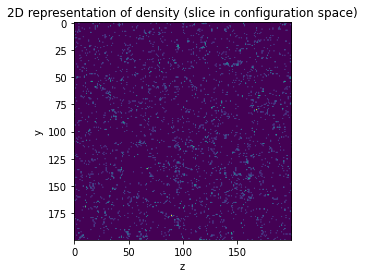

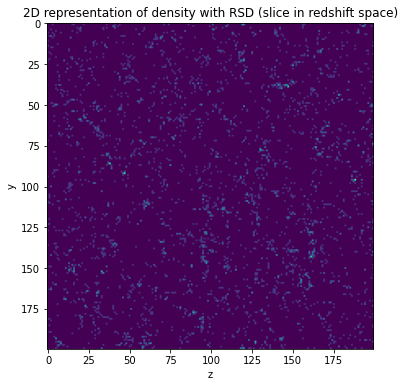

In [10]:
plt.title(r'2D representation of density (slice in configuration space)')
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(density_arr[100,:,:])
plt.xlabel('z')
plt.ylabel('y')
plt.show()

plt.title(r'2D representation of density with RSD (slice in redshift space)')
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(density_arrS[100,:,:])
plt.xlabel('z')
plt.ylabel('y')
plt.show()

In [11]:
kx = np.fft.fftfreq(density_arr.shape[0])
ky = np.fft.fftfreq(density_arr.shape[1])
kz = np.fft.fftfreq(density_arr.shape[2])

k_pk = np.linspace(0, 0.9, 50)
dk = 0.9/49 # dk = 0.018367346938775512

# Using n-dim FFT.

density_fft = np.fft.fftn(density_arr)
density_fft_SD = np.fft.fftn(density_arrS)

In [12]:
pre_var = np.zeros(len(k_pk))
pre_varS = np.zeros(len(k_pk))

n_count = np.zeros(len(k_pk))
# n_countS = np.zeros(len(k_pk))

# for every value in k, we're gonna take the variance of delta(k)
for i in range(len(kx)):
    for j in range(len(ky)):
        for m in range(len(kz)):
            k = ((kx[i])**2 + (ky[j])**2 + (kz[m])**2)**0.5
            index = np.where( (k_pk + dk/2 > k) & (k_pk - dk/2 < k) )
            pre_var[index[0]] += np.abs(density_fft[i][j][m])**2  # associates the dens. value of certain x,y,z point
            pre_varS[index[0]] += np.abs(density_fft_SD[i][j][m])**2
            n_count[index[0]] += 1

variance_arr = np.zeros(len(pre_var))
variance_arrS = np.zeros(len(pre_var))

for nn in range(len(pre_var)):
    variance_arr[nn] = pre_var[nn]/n_count[nn]
    variance_arrS[nn] = pre_varS[nn]/n_count[nn]

print(variance_arr, '\n \n', variance_arrS)

[1.67525851e+10 1.50119698e+07 8.18429090e+06 6.10655742e+06
 4.33255630e+06 3.37399822e+06 2.70246324e+06 2.23517986e+06
 1.98435938e+06 1.72731925e+06 1.51665743e+06 1.40778120e+06
 1.26541727e+06 1.18365800e+06 1.11691892e+06 1.04401369e+06
 1.00375116e+06 9.63971104e+05 9.27270797e+05 8.95897856e+05
 8.68964808e+05 8.53614070e+05 8.32964600e+05 8.18482010e+05
 8.01116609e+05 7.92553171e+05 7.82594968e+05 7.73233190e+05
 7.67178209e+05 7.54832007e+05 7.47047871e+05 7.43604161e+05
 7.39863559e+05 7.30491456e+05 7.25223447e+05 7.21679247e+05
 7.15266889e+05 7.13241707e+05 7.06895841e+05 7.02656041e+05
 7.08127792e+05 6.97483094e+05 7.18910596e+05 7.07885292e+05
 6.86746176e+05 6.89003267e+05 6.79542284e+05 6.30667150e+05
            nan            nan] 
 
 [1.67605600e+10 2.98449420e+07 1.47347375e+07 1.04235632e+07
 6.94641776e+06 5.07707352e+06 3.82992126e+06 3.00923782e+06
 2.48574758e+06 2.09470705e+06 1.77294484e+06 1.55815374e+06
 1.36297946e+06 1.24783625e+06 1.13725331e+06 1.0

<ipython-input-12-9e7fc31d86d7>:21: RuntimeWarning: invalid value encountered in double_scalars
  variance_arr[nn] = pre_var[nn]/n_count[nn]
<ipython-input-12-9e7fc31d86d7>:22: RuntimeWarning: invalid value encountered in double_scalars
  variance_arrS[nn] = pre_varS[nn]/n_count[nn]


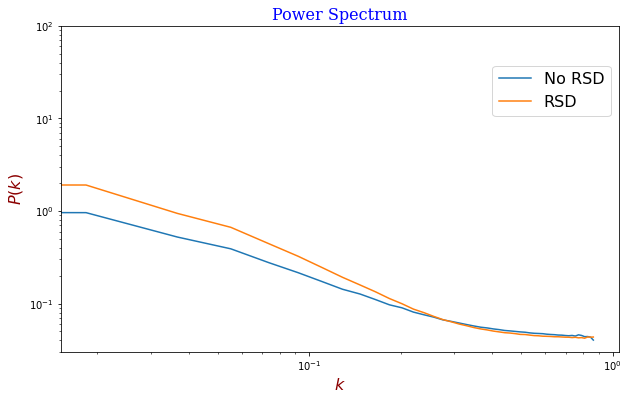

In [15]:
N = grid_x.shape[0] -1
L = gridsize*N
norm_factor = (L**3)/N**6

Pk_arr = norm_factor*(1/(2*np.pi)**(3))*variance_arr
Pk_arrS = norm_factor*(1/(2*np.pi)**(3))*variance_arrS

plt.loglog(k_pk,Pk_arr, label=r'No RSD')
plt.loglog(k_pk,Pk_arrS, label=r'RSD')

font1 = {'family':'serif','color':'blue','size':16}
font2 = {'family':'serif','color':'darkred','size':16}
plt.legend(loc='right',bbox_to_anchor=(1, 0.8), fontsize=16)
plt.title(r'Power Spectrum',fontdict = font1)
plt.xlabel(r"$k$", fontdict = font2)
plt.ylabel(r"$P(k)$", fontdict = font2)
plt.rcParams["figure.figsize"] = (10,6)
plt.ylim(0.03,100)
plt.show()

We know $\frac{P_{RSD}(k)}{P(k)} = 1 + \frac{2}{3}\beta +\frac{1}{5} \beta^2 = \frac{(b \sigma_8(z) + f \sigma_8(z))^2}{\sigma_8^2(z)}$, with $f = 0.81$ and $b = 2.1$.

In [33]:
# So, computing sigma8
𝑓 = 0.81; 𝑏 = 2.1
beta = f/b

quotient_pk = Pk_arrS/Pk_arr

# beta_polinom = b**2 + (2/3)*b*f + (1/5)*f**2

beta_polinom = 1 + (2/3)*beta + (1/5)*beta**2
print(quotient_pk, '\n \n',beta_polinom)

np.mean(quotient_pk[:48])

[1.00047604 1.98807633 1.80036825 1.70694591 1.60330698 1.50476473
 1.41719643 1.34630679 1.25267006 1.21269247 1.16898174 1.10681528
 1.07709883 1.05422027 1.01820579 1.00598455 0.98978815 0.97479911
 0.9706901  0.96135322 0.95794551 0.95190991 0.94765403 0.94493418
 0.94645278 0.94811658 0.94606688 0.93990736 0.94424082 0.9462746
 0.9440335  0.9444052  0.93942802 0.94877164 0.95186228 0.94987293
 0.95822553 0.95569262 0.95942457 0.96440306 0.94840955 0.97002354
 0.92799847 0.94778702 0.96194967 0.98952744 0.99861051 1.07932423
        nan        nan] 
 
 1.2868979591836736


1.0827915304552245

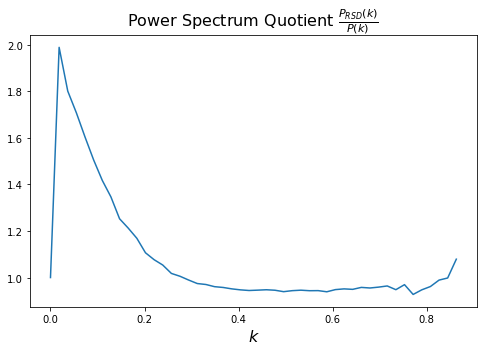

In [21]:
plt.plot(k_pk,quotient_pk)

plt.title(r'Power Spectrum Quotient $\frac{P_{RSD}(k)}{P(k)}$', fontsize = 16)
plt.xlabel(r"$k$", fontsize = 16)
plt.rcParams["figure.figsize"] = (8,5)
# plt.ylim(0.03,100)
plt.show()